In [1]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1)	A partir da imagem original obtenha as outras imagens conforme descrição

Desejamos separar linhas de círculos. Uma operação de abertura com um elemento estruturante na forma de círculo (definir o raio) faz essa tarefa.


In [2]:
def genStructurantElement(sizeX = 3, sizeY = 3):
    listArcs = []
    for i in range(int(-sizeX/2), int(sizeX/2)+1):
        for j in range(int(-sizeY/2), int(sizeY/2)+1):
            listArcs.append([i,j])
    return listArcs

In [5]:
genStructurantElement()

[[-1, -1], [-1, 0], [-1, 1], [0, -1], [0, 0], [0, 1], [1, -1], [1, 0], [1, 1]]

In [3]:
def getListElements(img, threshold):
    dim = img.shape
    listElements = []
    for i in range(0, dim[0]):
        for j in range(0, dim[1]):
            if img[i,j] > threshold:
                listElements.append([i,j])
    return listElements

def generateImageFromList(img, listOfElements):
    temp = [i for i in listOfElements]
    newImg = np.zeros(img.shape)
    for i in listOfElements:
        if i[0]<0 or i[1]<0 or i[0] > (img.shape[0]-1) or i[1]>(img.shape[1]-1):
            temp = deleteFromList([i],temp)
    for i in temp:
        newImg[i[0], i[1]] = 1
    return newImg

In [9]:
img = np.random.rand(100,100)
img.shape

(100, 100)

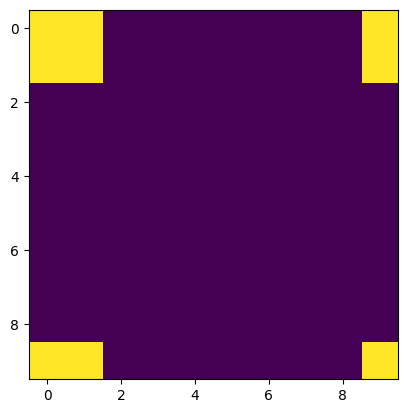

In [36]:
plt.imshow(generateImageFromList(img, genStructurantElement()))

In [4]:
def binaryDilatation(listImageElements, listStructuralElements):
    newListImageElements = [i for i in listImageElements]
    for element in listImageElements:
        for sEle in listStructuralElements:
            #adicionar coordenadas
            nElement = [element[0]+sEle[0],element[1]+sEle[1]]
            if isElementInList(nElement ,listImageElements) == False:
                newListImageElements.append(nElement)
    return newListImageElements

def isElementInList(node, listNodes):
    var = False
    for i in listNodes:
        if node == i:
            var=True
    return var

def deleteFromList(listSelected, listAll):
    temp = listAll
    for i in listSelected:
        if isElementInList(i,listAll):
            temp.remove(i)
    return temp

def binaryErosionM(listImageElements, listStructuralElements):
    newListImageElements = [i for i in listImageElements]
    for element in listImageElements:
        listAux = []
        for sEle in listStructuralElements:
            listAux.append([element[0]+sEle[0],element[1]+sEle[1]])
        band = False
        for i in listAux:
            if isElementInList(i,listImageElements) == False:
                band = True
        if band == True:
            newListImageElements = deleteFromList([element], newListImageElements)
    return newListImageElements

def binaryErosion(listImageElements, listStructuralElements):
    newListImageElements = []
    for element in listImageElements:
        listAux = [[element[0] + sEle[0], element[1] + sEle[1]] for sEle in listStructuralElements]
        if all(i in listImageElements for i in listAux):
            newListImageElements.append(element)
    return newListImageElements

In [241]:
if all(i in [[1,2],[3,9],[5,6],[4,4]] for i in [[1,2],[3,8]]):
    print("hola")

In [264]:
imgList = [[5,5]]
strEle = genStructurantElement(sizeX = 3, sizeY = 3)
newList = binaryDilatation(imgList, strEle)
newList

[[5, 5], [4, 4], [4, 5], [4, 6], [5, 4], [5, 6], [6, 4], [6, 5], [6, 6]]

In [265]:
newList = binaryErosion(newList, strEle)
temp2 = generateImageFromList(img, newList)
newList

[[5, 5]]

Text(0.5, 1.0, 'Erosion')

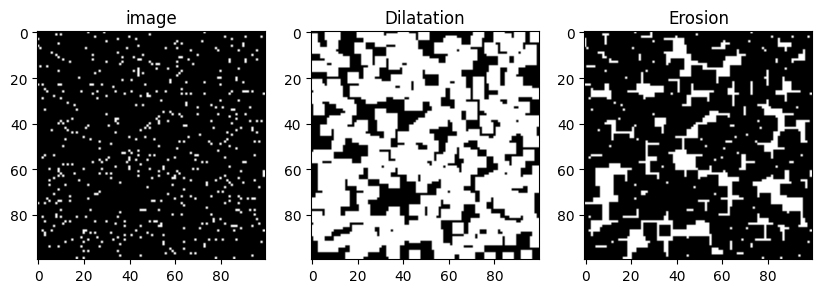

In [10]:
f, axarr = plt.subplots(1,3, figsize=(10,10))

imgList = getListElements(img, 0.95)
#imgList = [[5,5]]
temp = generateImageFromList(img, imgList)

strEle = genStructurantElement(sizeX = 4, sizeY = 4)

newList = binaryDilatation(imgList, strEle)
temp1 = generateImageFromList(img, newList)

newList = binaryErosion(newList, strEle)
temp2 = generateImageFromList(img, newList)

axarr[0].imshow(temp, cmap='gray')
axarr[1].imshow(temp1, cmap='gray')
axarr[2].imshow(temp2, cmap='gray')

axarr[0].set_title('image')
axarr[1].set_title('Dilatation') 
axarr[2].set_title('Erosion') 

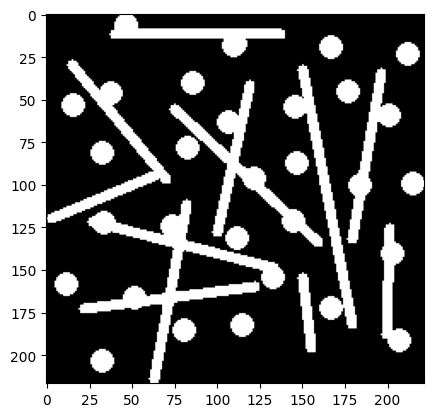

In [13]:
img1 = cv2.imread("art3.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);


In [376]:
#strEle = [[-5,0],[-4,0],[-3,0],[-2,0],[-1,0],[0,0],[1,0],[2,0],[3,0],[4,0],[0,1],[0,-1],[0,2],[0,-2],[0,3],[0,-3],[0,4],[0,-4]]
strEle = [[2,-2],[1,-1],[0,0],[1,1]]

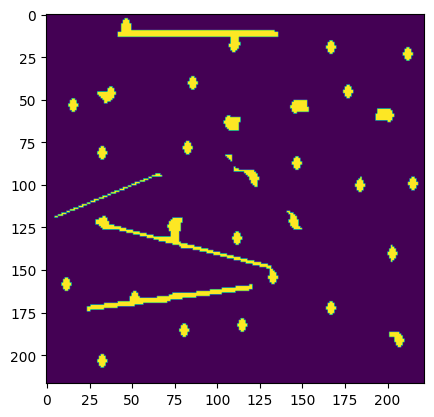

In [382]:
strEle = genStructurantElement(sizeX = 3, sizeY = 9)
imgList = getListElements(img1, 250)
newList = binaryErosion(imgList, strEle)
temp2 = generateImageFromList(img1, newList)
plt.imshow(temp2)

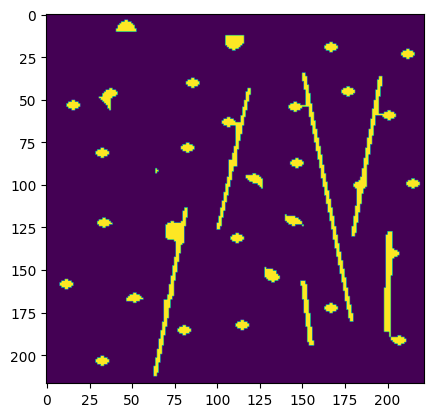

In [383]:
strEle = genStructurantElement(sizeX = 9, sizeY = 3)
imgList = getListElements(img1, 250)
newList = binaryErosion(imgList, strEle)
temp2 = generateImageFromList(img1, newList)
plt.imshow(temp2)

2)

a) Obter linhas verticais. Abertura com elemento estruturante vertical 3x9
b) Obter linhas horizontais. Abertura com elemento estruturante horizontal 9x3. Tente eliminar as linhas erradas usando uma máscara maior


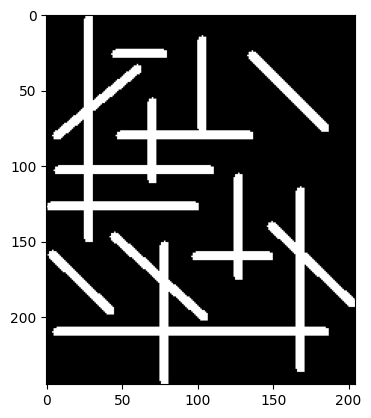

In [14]:
img2 = cv2.imread("art2.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img2, cmap='gray', vmin=0, vmax=255);

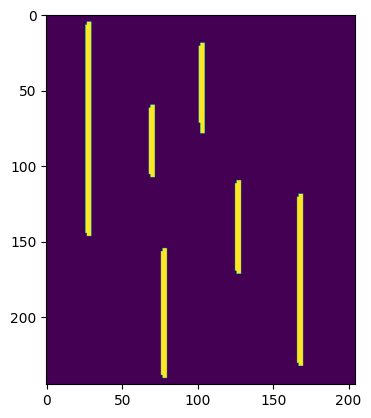

In [15]:
strEle = genStructurantElement(sizeX = 9, sizeY = 3)
imgList = getListElements(img2, 250)
newList = binaryErosion(imgList, strEle)
temp2 = generateImageFromList(img2, newList)
plt.imshow(temp2)

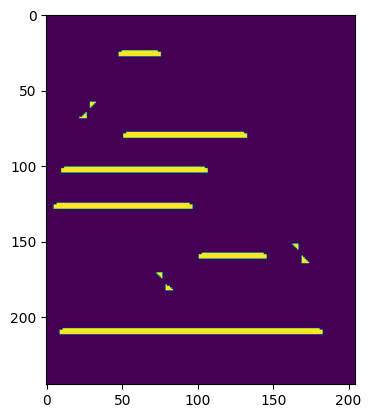

In [16]:
strEle = genStructurantElement(sizeX = 3, sizeY = 9)
imgList = getListElements(img2, 250)
newList = binaryErosion(imgList, strEle)
temp2 = generateImageFromList(img2, newList)
plt.imshow(temp2)

3)

a) Theshold (t=210)

b) Utilizando abertura com elemento circular de 11 pixels para reter as células grandes

c) É possível reter somente os objetos pequenos utilizando a operação abertura?

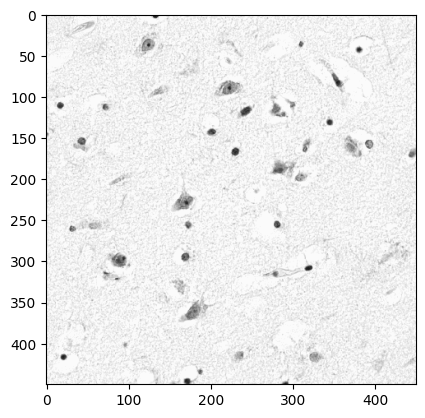

In [2]:
img3 = cv2.imread("cel4.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img3, cmap='gray', vmin=0, vmax=255);

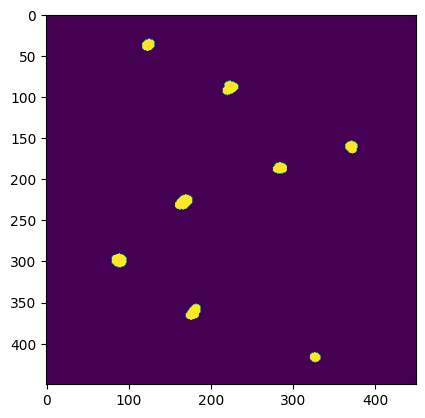

: 

In [12]:
# a) Threshold (t=210)
_, thresholded = cv2.threshold(img3, 210, 255, cv2.THRESH_BINARY)
thresholded = 255 - thresholded

# b) Utilizando abertura com elemento circular de 11 pixels
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))  # Elemento estruturante circular de 11 pixels
opened_image = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)

# Exibir as imagens resultantes
#cv2.imshow('Thresholded Image', thresholded)
plt.imshow( opened_image)

4)
Utilizando os conceitos já aprendidos na disciplina, faça um código que calcula a quantidade de objetos da imagem abaixo. Pode-se utilizar funções prontas do opencv (não para realizar a contagem em si, mas para realizar os passos necessários)

In [1]:
def otsu_threshold(image):
    # Compute the histogram of the image
    hist, bins = np.histogram(image, bins=256, range=(0, 256))

    # Total number of pixels in the image
    total_pixels = image.size

    # Initialize variables to store optimal threshold and maximum between-class variance
    max_variance = 0
    optimal_threshold = 0
    varianceList = []

    # Iterate through possible threshold values
    for threshold in range(256):
        # Calculate probabilities and means of the two classes
        w0 = np.sum(hist[:threshold]) / total_pixels
        w1 = 1 - w0
        u0 = np.sum(np.arange(threshold) * hist[:threshold]) / (w0 * total_pixels)
        u1 = np.sum(np.arange(threshold, 256) * hist[threshold:]) / (w1 * total_pixels)

        # Calculate between-class variance
        variance = w0 * w1 * (u0 - u1) ** 2
        varianceList.append(variance)
        # Update optimal threshold if variance is greater
        if variance > max_variance:
            max_variance = variance
            optimal_threshold = threshold
    varianceList = np.array(varianceList)

    varianceList[np.isnan(varianceList)] = 0
    
    return optimal_threshold, varianceList

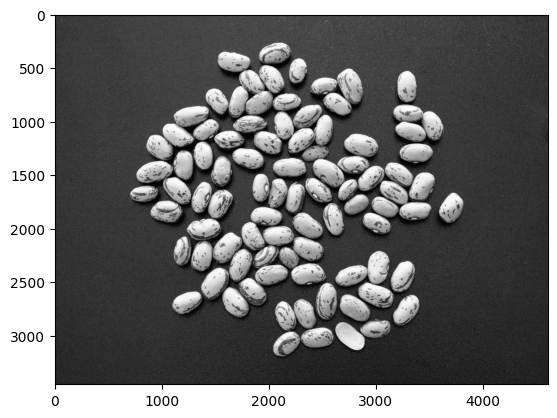

In [5]:
img4 = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img4, cmap='gray', vmin=0, vmax=255);

In [16]:
def logarithmImg(img, alpha=0.5, q=255.0):
    c = q / np.log(1 + np.max(img))
    g = alpha * c * np.log1p(img)
    return g

def exponentImg(img, alpha, q):
    A = q / (1-np.exp(-alpha))
    temp = (1 - np.exp(-alpha * img / q))
    return A * temp

alpha = 0.5  # Puedes ajustar el valor de alpha según tus necesidades
q = 255.0  # Puedes ajustar el valor de q según tus necesidades

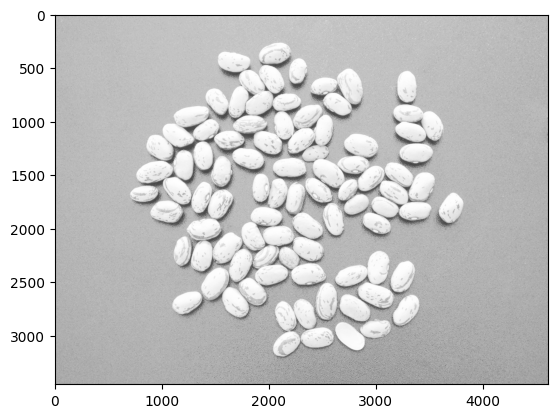

In [23]:
imgAux = logarithmImg(img4, 0.2)
imgAux = np.uint8(imgAux/np.max(imgAux)*255)
plt.imshow(imgAux, cmap='gray', vmin=0, vmax=255)

In [63]:

_, binary_image = cv2.threshold( imgAux , 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

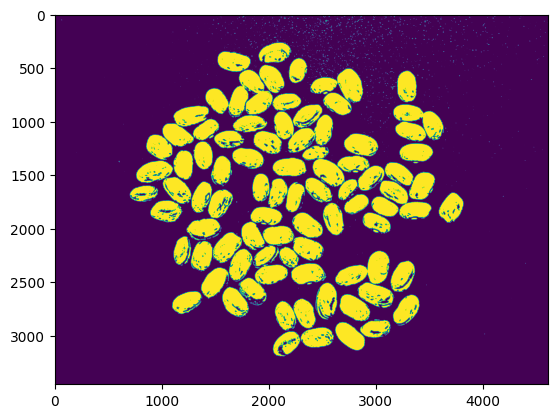

In [64]:
plt.imshow(binary_image)

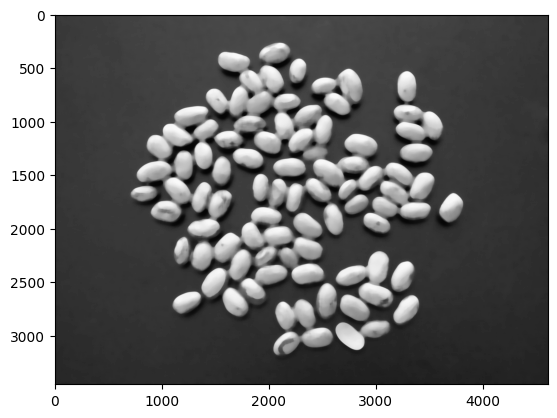

In [27]:
#result = cv2.GaussianBlur(img4, (61, 61), 200)
#result = cv2.blur(exp_transformed, (101, 101))
#result = cv2.equalizeHist(img4)
#result = np.uint8((result + img4)/2)
result = cv2.medianBlur(img4, 51)
plt.imshow(result, cmap='gray', vmin=0, vmax=255)

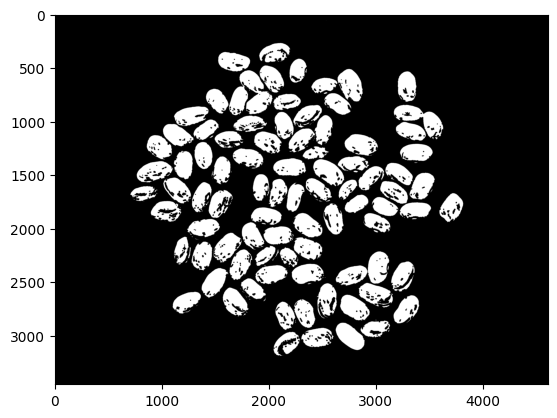

In [73]:
kernel = np.array([ [1, 1, 1, 1],
                    [1, 1, 1, 1],
                    [1, 1, 1, 1],
                    [1, 1, 1, 1]], dtype=np.uint8)
tempImg = cv2.erode(binary_image, kernel, iterations=3)
tempImg = cv2.dilate(binary_image, kernel, iterations=2)
tempImg = cv2.erode(binary_image, kernel, iterations=2)
plt.imshow(tempImg, cmap='gray', vmin=0, vmax=255)

In [77]:
aux = np.uint8( tempImg/np.max(tempImg)*255 ) 
aux.shape

(3456, 4608)

In [78]:
scaled_image = cv2.resize(tempImg, ( int(tempImg.shape[1]/10), int(tempImg.shape[0]/10) ))

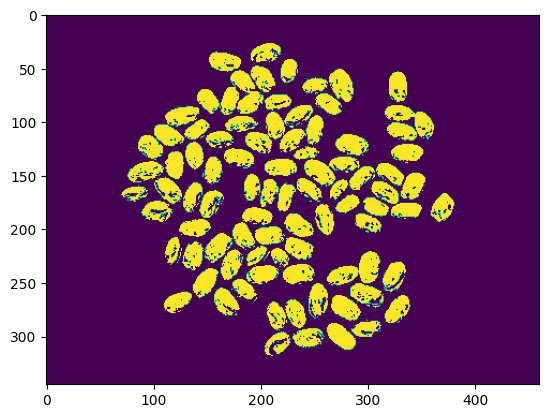

In [81]:
plt.imshow(scaled_image>10)

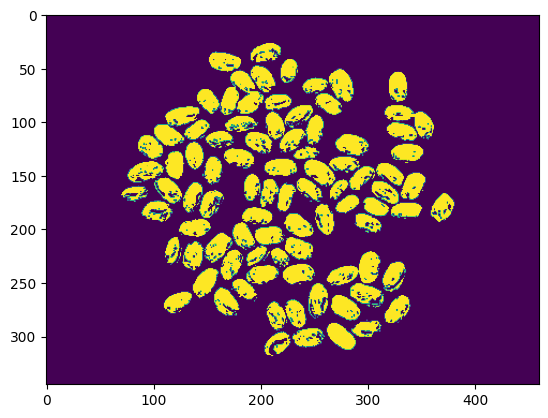

In [37]:
plt.imshow(scaled_image)

In [51]:
def thresholdImage(img, threshold):
    tempImage = np.zeros(img.shape)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            if img[i,j] < threshold:
                tempImage[i,j] = 1
    return tempImage

In [82]:
newImageWith = assigLabelsToImage(scaled_image>10)

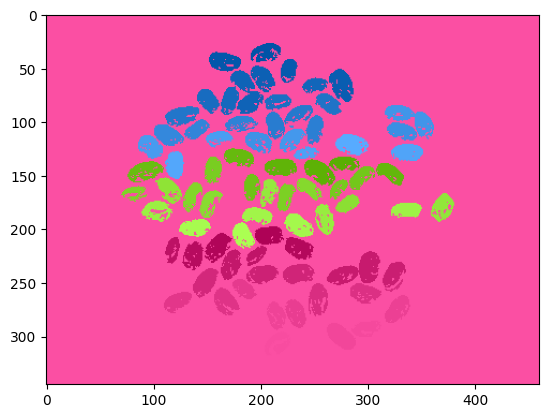

In [83]:
plt.imshow(newImageWith)

In [84]:
temp, equivalencias = componentesConexas(scaled_image>10)
groups = getGroupsOfLabels(equivalencias)

In [85]:
len(groups)

82

In [38]:
def componentesConexas(img):
    dim = img.shape
    aux = np.zeros(img.shape)
    count = 1
    equv = []
    for i in range(1,dim[0]):
        for j in range(1,dim[1]):
            p = img[i,j]
            r = img[i,j-1]
            t = img[i-1,j]
            if p == 1:
                if r == 0 and t == 0 :
                    aux[i,j] = count
                    count = count + 1
                elif r == 1 and t == 0 :
                    aux[i,j] = aux[i,j-1]
                elif r == 0 and t == 1:
                    aux[i,j] = aux[i-1,j]
                elif ((r + t) == 2) and (aux[i,j-1] == aux[i-1,j]) :
                    aux[i,j] = aux[i,j-1]
                else:
                    aux[i,j] = aux[i,j-1]
                    equv.append([aux[i,j-1],aux[i-1,j]])
                    equv.append([aux[i-1,j],aux[i,j-1]])
    return aux, equv

def associated_Nodes(node, edges):
    index = edges[:,0] == node
    associatedNodes = np.unique(edges[index,1]).tolist()
    return associatedNodes

def isElementInList(node, listNodes):
    var = False
    for i in listNodes:
        if node == i:
            var=True
    return var

def deleteFromList(listAll, listSelected):
    temp = listAll
    for i in listSelected:
        if isElementInList(i,listAll):
            temp.remove(i)
    return temp

def getGroupsOfLabels(equivalences):
    equiv = np.array(equivalences)
    groups = []
    uniqueIndex = np.unique(equiv[:,0]).tolist()

    for node in uniqueIndex:
        subgroup_list = []
        subgroup_list.append(node)
        for subgroupElement in subgroup_list:
            associatedNodes = associated_Nodes(subgroupElement, equiv)
            for assoNode in associatedNodes:
                if isElementInList(assoNode, subgroup_list)==False:
                    subgroup_list.append(assoNode)
        groups.append(subgroup_list)
        uniqueIndex = deleteFromList(uniqueIndex, subgroup_list)
        
    return groups

def generateColor(max_colors, index):
    # Asegurarse de que el índice esté en el rango [0, max_colores - 1]
    indice = max(0, min(max_colors - 1, index))

    r = int(255 * (index / max_colors))
    g = int(255 * ((index + max_colors // 3) / max_colors) % 256)
    b = int(255 * ((index + 2 * max_colors // 3) / max_colors) % 256)

    return np.array([r, g, b])

def assigLabelsToImage(img):
    newImg = np.ones((img.shape[0],img.shape[1],3), 'uint8')*255
    temp, equivalencias = componentesConexas(img)
    groups = getGroupsOfLabels(equivalencias)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            #identificar grupo
            node = temp[i,j]
            indexColor = 0
            for k in range(0,len(groups)):
                if isElementInList(node, groups[k]):
                    indexColor = k
                    break
            newColor = generateColor(len(groups), k)
            newImg[i,j,:] = newColor
    return newImg
    

5.  Utilize a transformada hit or miss para localizar o logotipo da UFU. Escolha um deles

Text(0.5, 1.0, 'Logo location')

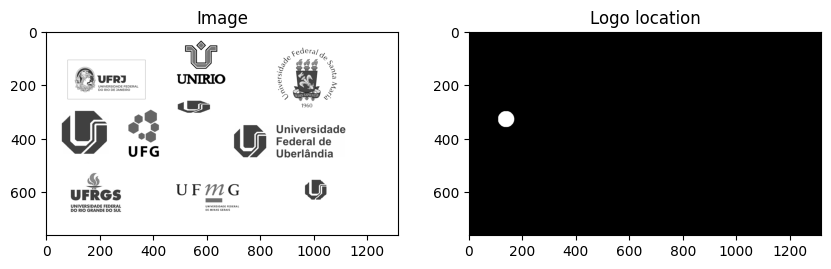

In [14]:
f, axarr = plt.subplots(1,2, figsize=(10,10))

img5 = cv2.imread("logotipos.png", cv2.IMREAD_GRAYSCALE)

_, thresholded = cv2.threshold(img5, 200, 255, cv2.THRESH_BINARY)
thresholded = 255 - thresholded

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (60, 60)) 
opened_image = cv2.morphologyEx(thresholded, cv2.MORPH_OPEN, kernel)

axarr[0].imshow(img5, cmap='gray')
axarr[1].imshow(opened_image, cmap='gray')

axarr[0].set_title('Image')
axarr[1].set_title('Logo location') 

6. Utilize operadores morfológicos para extração de fronteiras dos feijões. Mostre o resultado junto com a imagem original